In [3]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import LinRegLearner as lrl
import DTLearner as dt
import RTLearner as rt
import BagLearner as bl
#import InsaneLearner as it
import sys
%matplotlib inline

## DTLearner Analysis

Does overfitting occur with respect to leaf_size? Consider the dataset istanbul.csv with DTLearner. For which values of leaf_size does overfitting occur? Use RMSE as your metric for assessing overfitting. Support your assertion with graphs/charts. (Don't use bagging).

In [4]:
data = pd.read_csv("Data/Istanbul.csv") 
data = data.drop(['date'], axis=1).values

In [5]:
# compute how much of the data is training and testing
train_rows = int(0.6* data.shape[0])
test_rows = data.shape[0] - train_rows
# separate out training and testing data
trainX = data[:train_rows,0:-1]
trainY = data[:train_rows,-1]
testX = data[train_rows:,0:-1]
testY = data[train_rows:,-1]
print(testX.shape)
print(testY.shape)

(215, 8)
(215,)


In [45]:
rmse_train = []
rmse_test = []
corr_train = []
corr_test = []
leaf_size = []

for i in range(1,50):
    leaf_size.append(i)
    learner = dt.DTLearner(leaf_size = i, verbose = False) 
    learner.addEvidence(trainX, trainY) 
    
    pred_train = learner.query(trainX) 
    rmse_train.append(math.sqrt(((trainY - pred_train) ** 2).sum()/trainY.shape[0]))
    corr_train.append(np.corrcoef(pred_train, y=trainY)[0,1])

    pred_test = learner.query(testX) 
    rmse_test.append(math.sqrt(((testY - pred_test) ** 2).sum()/testY.shape[0]))
    corr_test.append(np.corrcoef(pred_test, y=testY)[0,1])
    

/home/talant/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


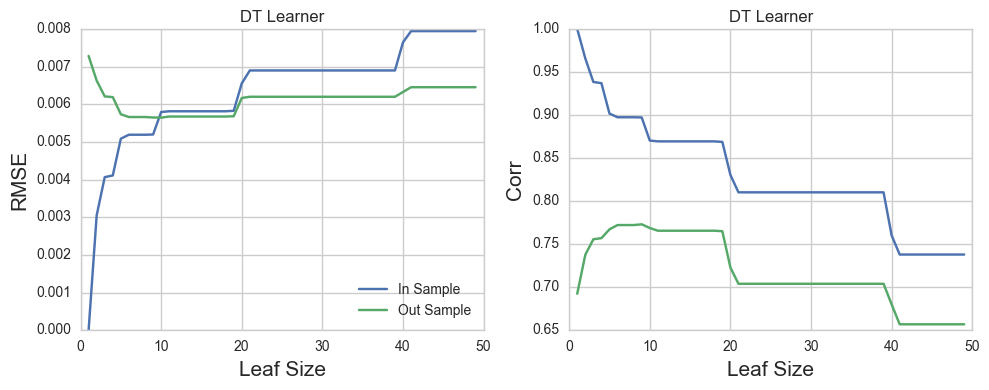

In [46]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(10,4))
p1 = plt.subplot(121, title = 'DT Learner')
plt.plot(leaf_size, rmse_train)
plt.plot(leaf_size, rmse_test)
plt.legend(["In Sample","Out Sample"],loc=4)
plt.ylabel('RMSE', size=15)
plt.xlabel('Leaf Size',size=15)

p2 = plt.subplot(122, title = 'DT Learner')
plt.plot(leaf_size, corr_train)
plt.plot(leaf_size, corr_test)
plt.ylabel('Corr', size=15)
plt.xlabel('Leaf Size',size=15)

fig.set_tight_layout(True)
plt.show()
fig.savefig('plots/DTLearner.png')

It looks like overfitting occurs as we increase leaf size. 

## DTLerner with Bagging

Can bagging reduce or eliminate overfitting with respect to leaf_size? Again consider the dataset istanbul.csv with DTLearner. To investigate this choose a fixed number of bags to use and vary leaf_size to evaluate. Provide charts and/or tables to validate your conclusions.

In [43]:
rmse_train = []
rmse_test = []
corr_train = []
corr_test = []
leaf_size = []

for i in range(1,50):
    leaf_size.append(i)
    learner = bl.BagLearner(learner = dt.DTLearner, kwargs = {"leaf_size":i}, bags = 10, boost = False, verbose = False)
    learner.addEvidence(trainX, trainY)
    
    pred_train = learner.query(trainX) 
    rmse_train.append(math.sqrt(((trainY - pred_train) ** 2).sum()/trainY.shape[0]))
    corr_train.append(np.corrcoef(pred_train, y=trainY)[0,1])

    pred_test = learner.query(testX) 
    rmse_test.append(math.sqrt(((testY - pred_test) ** 2).sum()/testY.shape[0]))
    corr_test.append(np.corrcoef(pred_test, y=testY)[0,1])       

/home/talant/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


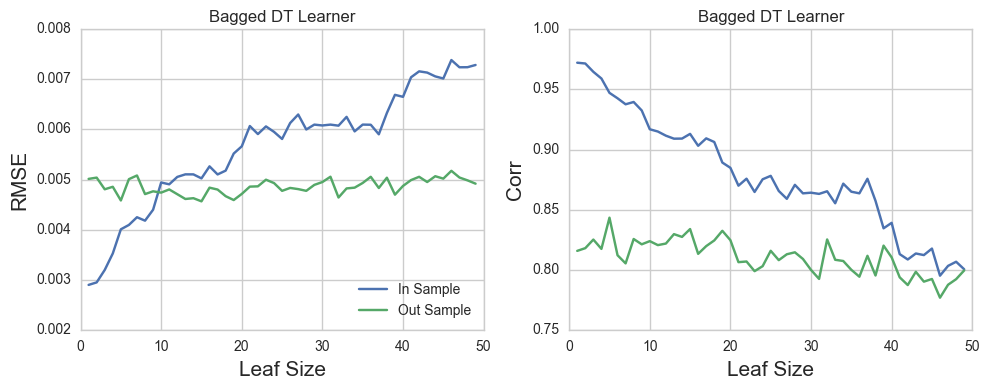

In [44]:
fig = plt.figure(figsize=(10,4))
p1 = plt.subplot(121, title = 'Bagged DT Learner')
plt.plot(leaf_size, rmse_train)
plt.plot(leaf_size, rmse_test)
plt.legend(["In Sample","Out Sample"],loc=4)
plt.ylabel('RMSE', size=15)
plt.xlabel('Leaf Size',size=15)

p2 = plt.subplot(122, title = 'Bagged DT Learner')
plt.plot(leaf_size, corr_train)
plt.plot(leaf_size, corr_test)
plt.ylabel('Corr', size=15)
plt.xlabel('Leaf Size',size=15)

fig.set_tight_layout(True)
plt.show()
fig.savefig('plots/BaggedDTLearner.png')

## RT Learner

Quantitatively compare "classic" decision trees (DTLearner) versus random trees (RTLearner). In which ways is one method better than the other?

In [40]:
rmse_train = []
rmse_test = []
corr_train = []
corr_test = []
leaf_size = []

for i in range(1,50):
    leaf_size.append(i)
    learner = rt.RTLearner(leaf_size = i, verbose = False) 
    learner.addEvidence(trainX, trainY) 
    
    pred_train = learner.query(trainX) 
    rmse_train.append(math.sqrt(((trainY - pred_train) ** 2).sum()/trainY.shape[0]))
    corr_train.append(np.corrcoef(pred_train, y=trainY)[0,1])

    pred_test = learner.query(testX) 
    rmse_test.append(math.sqrt(((testY - pred_test) ** 2).sum()/testY.shape[0]))
    corr_test.append(np.corrcoef(pred_test, y=testY)[0,1])    

/home/talant/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


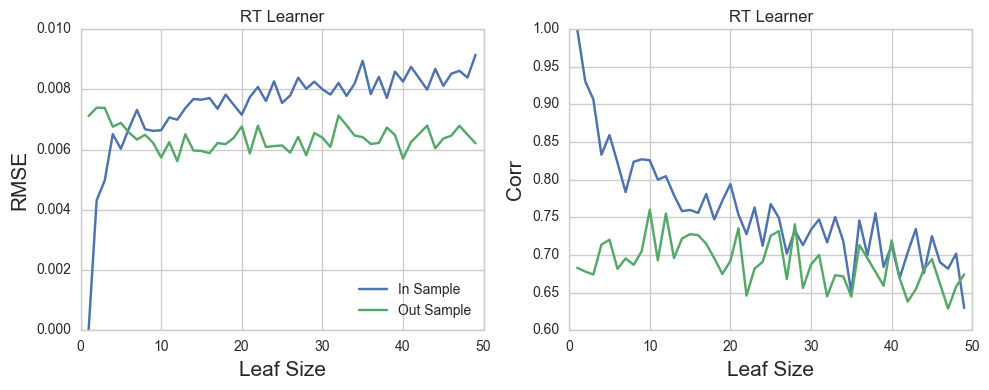

In [42]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(10,4))
p1 = plt.subplot(121, title = 'RT Learner')
plt.plot(leaf_size, rmse_train)
plt.plot(leaf_size, rmse_test)
plt.legend(["In Sample","Out Sample"],loc=4)
plt.ylabel('RMSE', size=15)
plt.xlabel('Leaf Size',size=15)

p2 = plt.subplot(122, title = 'RT Learner')
plt.plot(leaf_size, corr_train)
plt.plot(leaf_size, corr_test)
plt.ylabel('Corr', size=15)
plt.xlabel('Leaf Size',size=15)

fig.set_tight_layout(True)
plt.show()
fig.savefig('plots/RTLearner.png')